In [ ]:
docs = ['14 august',
		'pakistan',
		'this is pakistan',
		'jeetega bhai jeetega pakistan jeetega',
		'pakistan zindabad',
		'babar babar babar',
		'imran khan',
		'pakistan ex pm imran khan',
		'pakistaaan']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(docs)

In [ ]:
len(tokenizer.word_index)

14

In [ ]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[6, 7],
 [1],
 [8, 9, 1],
 [2, 10, 2, 1, 2],
 [1, 11],
 [3, 3, 3],
 [4, 5],
 [1, 12, 13, 4, 5],
 [14]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 6,  7,  0,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 8,  9,  1,  0,  0],
       [ 2, 10,  2,  1,  2],
       [ 1, 11,  0,  0,  0],
       [ 3,  3,  3,  0,  0],
       [ 4,  5,  0,  0,  0],
       [ 1, 12, 13,  4,  5],
       [14,  0,  0,  0,  0]], dtype=int32)

In [ ]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding

model = Sequential()
model.add(Embedding(14,output_dim=2,input_length=5)) # this is embedding layer with vacublary length 14, output dim 2 (meaning one word will be represented with two numbers) , max input length 5

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile('adam','accuracy')

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
X_train.shape

(25000, 50)

In [ ]:
import numpy as np

# Assuming X_train is a numpy array
max_index = np.max(X_train)


In [ ]:
print(X_train.shape)  # Check the shape of your input data
print(model.input_shape)  # Check the shape expected by your model


(25000, 50)
(None, 50)


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_train.dtype)
print(X_test.dtype)


(25000, 50)
(25000, 50)
(25000,)
(25000,)
int32
int32


In [ ]:
model = Sequential()
# model.add(Embedding(14000, 2))
model.add(Embedding(input_dim = max_index + 1, output_dim = 2, input_length=50))  # Add 1 to include the maximum index
model.add(SimpleRNN(50,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

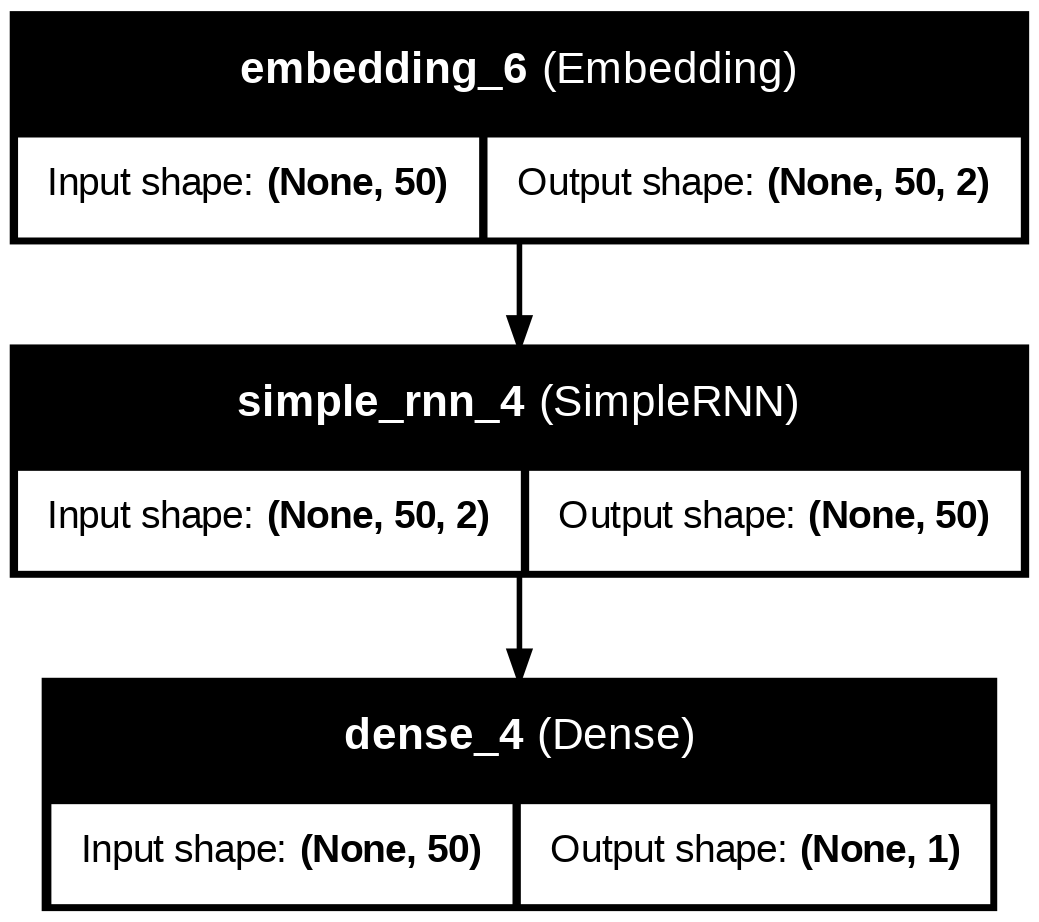

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(f"Max value in X_train: {X_train.max()}")
print(f"Max value in X_test: {X_test.max()}")

Max value in X_train: 88585
Max value in X_test: 88582


In [ ]:
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5397 - loss: 0.6807 - val_accuracy: 0.7920 - val_loss: 0.4521
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8216 - loss: 0.4033 - val_accuracy: 0.8151 - val_loss: 0.4171
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9004 - loss: 0.2574 - val_accuracy: 0.8084 - val_loss: 0.4673
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9379 - loss: 0.1740 - val_accuracy: 0.8003 - val_loss: 0.5087
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9605 - loss: 0.1152 - val_accuracy: 0.7845 - val_loss: 0.5579


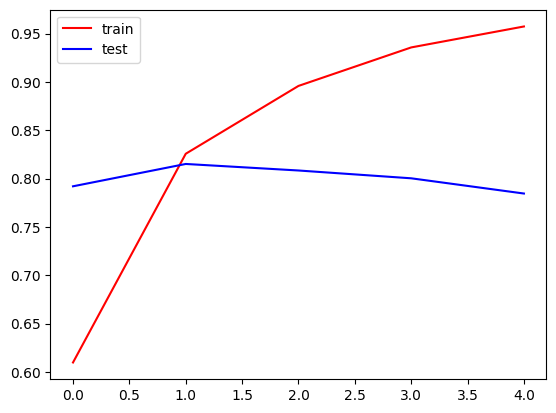

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

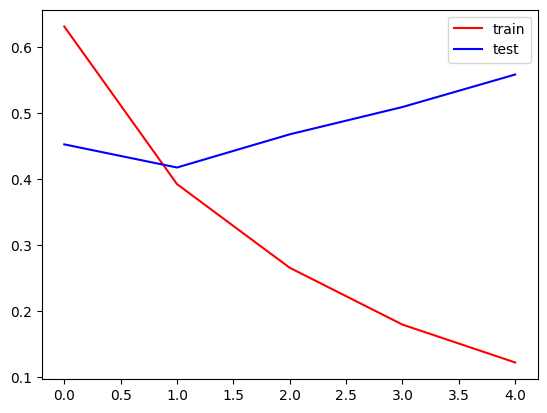

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

as we can clearly see that there is big gap between the va accuraccy/loss and the training accuracy/loss, so our model is geting overfit.